In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (correct path syntax)
data = pd.read_csv(r"C:\Users\pooja\Desktop\Repositories\ad688-employability-sp25A1-pooja\lightcast_job_postings.csv")

data.head()

<bound method NDFrame.head of                                              ID LAST_UPDATED_DATE  \
0      1f57d95acf4dc67ed2819eb12f049f6a5c11782c        2024-09-06   
1      0cb072af26757b6c4ea9464472a50a443af681ac        2024-08-02   
2      85318b12b3331fa490d32ad014379df01855c557        2024-09-06   
3      1b5c3941e54a1889ef4f8ae55b401a550708a310        2024-09-06   
4      cb5ca25f02bdf25c13edfede7931508bfd9e858f        2024-06-19   
...                                         ...               ...   
72471  4c25b449c876d8e22d3e356f368cde5ab525cd03        2024-09-06   
72472  241d30b5478c0b1715618e0cfac65d40f781c0d8        2024-10-21   
72473  3a0bc8e830dfb4ea44f721fb3139f41f398bb66d        2024-10-16   
72474  2e842ecdc031bdb4b8f8c2f724b5c51cdc7814eb        2024-10-16   
72475  733c12969489de888093ef22d09204dc0945148a        2024-10-09   

          LAST_UPDATED_TIMESTAMP  DUPLICATES      POSTED     EXPIRED  \
0      2024-09-06 20:32:57.352 Z           0  2024-06-02  2024-06-08 

In [3]:
print(data.columns)

Index(['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES',
       'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL',
       ...
       'NAICS_2022_2', 'NAICS_2022_2_NAME', 'NAICS_2022_3',
       'NAICS_2022_3_NAME', 'NAICS_2022_4', 'NAICS_2022_4_NAME',
       'NAICS_2022_5', 'NAICS_2022_5_NAME', 'NAICS_2022_6',
       'NAICS_2022_6_NAME'],
      dtype='object', length=131)


In [6]:
print(data.columns.to_list)


<bound method IndexOpsMixin.tolist of Index(['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES',
       'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL',
       ...
       'NAICS_2022_2', 'NAICS_2022_2_NAME', 'NAICS_2022_3',
       'NAICS_2022_3_NAME', 'NAICS_2022_4', 'NAICS_2022_4_NAME',
       'NAICS_2022_5', 'NAICS_2022_5_NAME', 'NAICS_2022_6',
       'NAICS_2022_6_NAME'],
      dtype='object', length=131)>


In [7]:
print(', '.join(data.columns))
print(data.columns.tolist())
print(data.columns.values.tolist())

ID, LAST_UPDATED_DATE, LAST_UPDATED_TIMESTAMP, DUPLICATES, POSTED, EXPIRED, DURATION, SOURCE_TYPES, SOURCES, URL, ACTIVE_URLS, ACTIVE_SOURCES_INFO, TITLE_RAW, BODY, MODELED_EXPIRED, MODELED_DURATION, COMPANY, COMPANY_NAME, COMPANY_RAW, COMPANY_IS_STAFFING, EDUCATION_LEVELS, EDUCATION_LEVELS_NAME, MIN_EDULEVELS, MIN_EDULEVELS_NAME, MAX_EDULEVELS, MAX_EDULEVELS_NAME, EMPLOYMENT_TYPE, EMPLOYMENT_TYPE_NAME, MIN_YEARS_EXPERIENCE, MAX_YEARS_EXPERIENCE, IS_INTERNSHIP, SALARY, REMOTE_TYPE, REMOTE_TYPE_NAME, ORIGINAL_PAY_PERIOD, SALARY_TO, SALARY_FROM, LOCATION, CITY, CITY_NAME, COUNTY, COUNTY_NAME, MSA, MSA_NAME, STATE, STATE_NAME, COUNTY_OUTGOING, COUNTY_NAME_OUTGOING, COUNTY_INCOMING, COUNTY_NAME_INCOMING, MSA_OUTGOING, MSA_NAME_OUTGOING, MSA_INCOMING, MSA_NAME_INCOMING, NAICS2, NAICS2_NAME, NAICS3, NAICS3_NAME, NAICS4, NAICS4_NAME, NAICS5, NAICS5_NAME, NAICS6, NAICS6_NAME, TITLE, TITLE_NAME, TITLE_CLEAN, SKILLS, SKILLS_NAME, SPECIALIZED_SKILLS, SPECIALIZED_SKILLS_NAME, CERTIFICATIONS, CERTI

## 1. AI vs. Non-AI Salary Comparison

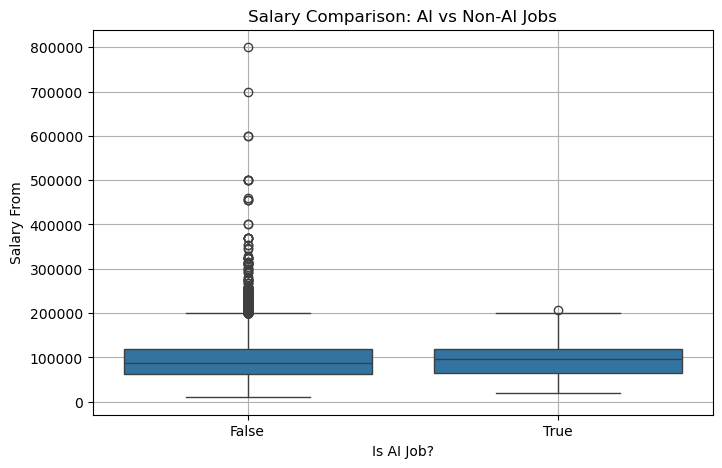

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create AI vs Non-AI flag
data['is_ai_job'] = data['TITLE_NAME'].str.contains('AI|Artificial Intelligence|Machine Learning|Data Scientist|ML|Deep Learning', case=False, na=False)

# Compare average salary
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_ai_job', y='SALARY_FROM', data=data)
plt.title('Salary Comparison: AI vs Non-AI Jobs')
plt.xlabel('Is AI Job?')
plt.ylabel('Salary From')
plt.grid(True)
plt.show()


## 2. Top Paying Regions (for AI vs Non-AI)

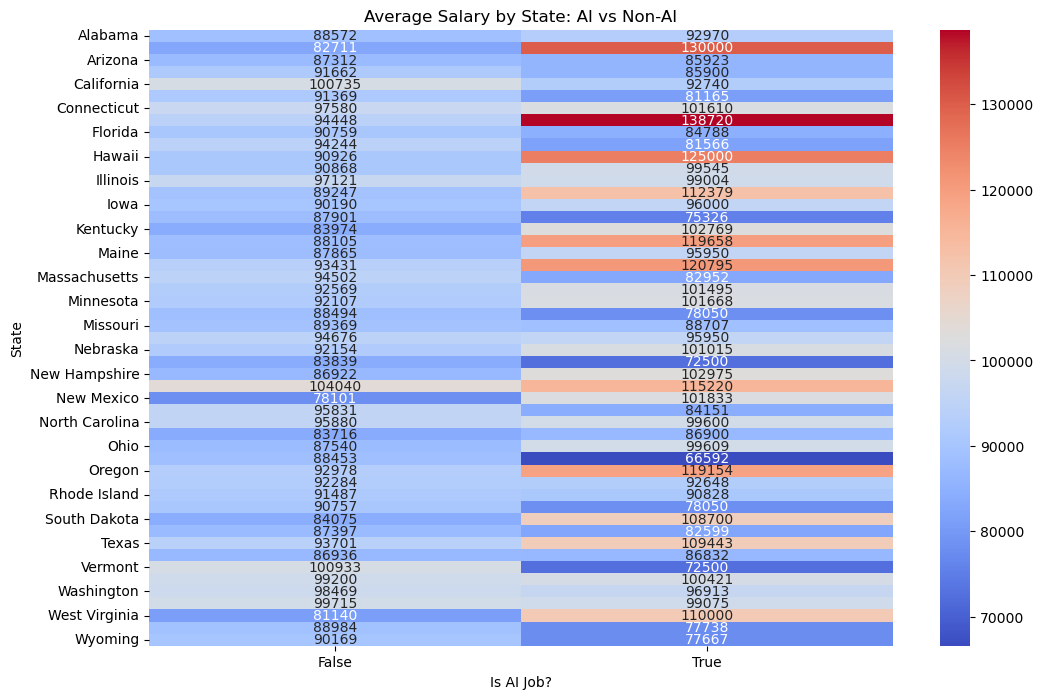

In [9]:
# Group by state and AI job status
region_salary = data.groupby(['STATE_NAME', 'is_ai_job'])['SALARY_FROM'].mean().reset_index()

# Pivot for heatmap
pivot_data = region_salary.pivot(index='STATE_NAME', columns='is_ai_job', values='SALARY_FROM')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Average Salary by State: AI vs Non-AI')
plt.xlabel('Is AI Job?')
plt.ylabel('State')
plt.show()


## 3. Remote vs In-Office Salary Comparison

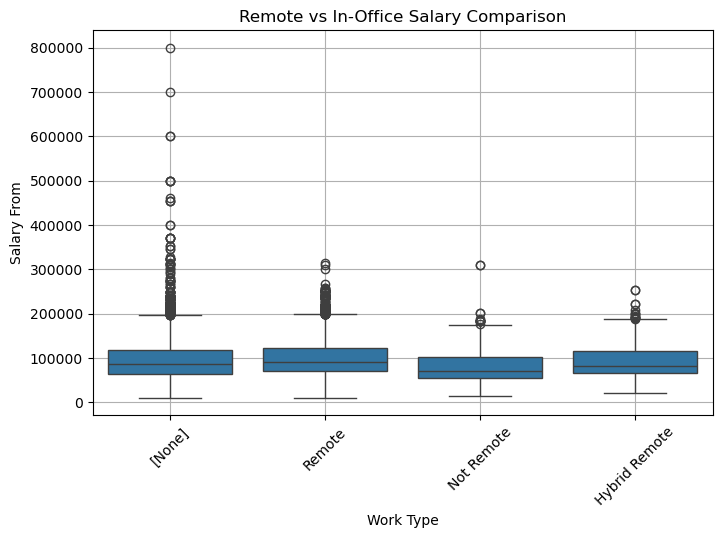

In [10]:
# Remove NaN remote types
remote_salary = data.dropna(subset=['REMOTE_TYPE_NAME'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='REMOTE_TYPE_NAME', y='SALARY_FROM', data=remote_salary)
plt.title('Remote vs In-Office Salary Comparison')
plt.xlabel('Work Type')
plt.ylabel('Salary From')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 4. Industry Salary Trends (2023 vs 2024)

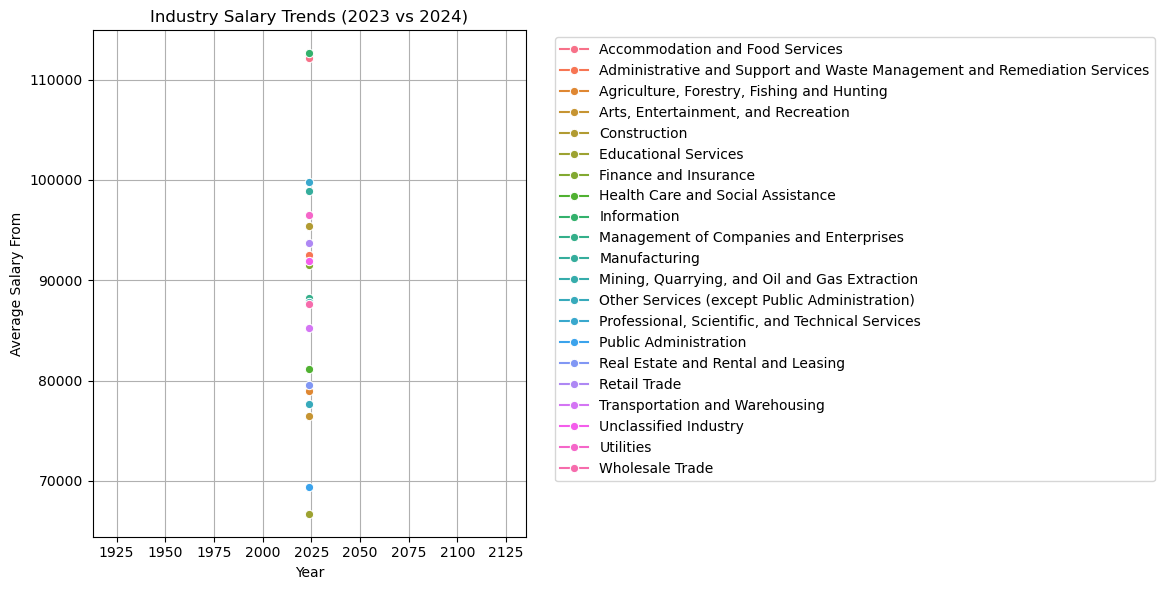

In [11]:
# Convert POSTED to datetime and extract year
data['POSTED'] = pd.to_datetime(data['POSTED'], errors='coerce')
data['year'] = data['POSTED'].dt.year

# Filter only 2023 and 2024
salary_trend = data[data['year'].isin([2023, 2024])]

# Group by industry and year
industry_salary = salary_trend.groupby(['NAICS2_NAME', 'year'])['SALARY_FROM'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_salary, x='year', y='SALARY_FROM', hue='NAICS2_NAME', marker='o')
plt.title('Industry Salary Trends (2023 vs 2024)')
plt.xlabel('Year')
plt.ylabel('Average Salary From')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## To clean/filter the salary ranges

In [12]:
# Filter out rows with null salary
salary_clean = data[data['SALARY_FROM'].notnull()]

# Calculate IQR
Q1 = salary_clean['SALARY_FROM'].quantile(0.25)
Q3 = salary_clean['SALARY_FROM'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
salary_filtered = salary_clean[(salary_clean['SALARY_FROM'] >= lower_bound) & (salary_clean['SALARY_FROM'] <= upper_bound)]

print(f"Original rows: {len(salary_clean)}")
print(f"Filtered rows (no outliers): {len(salary_filtered)}")


Original rows: 32408
Filtered rows (no outliers): 31961


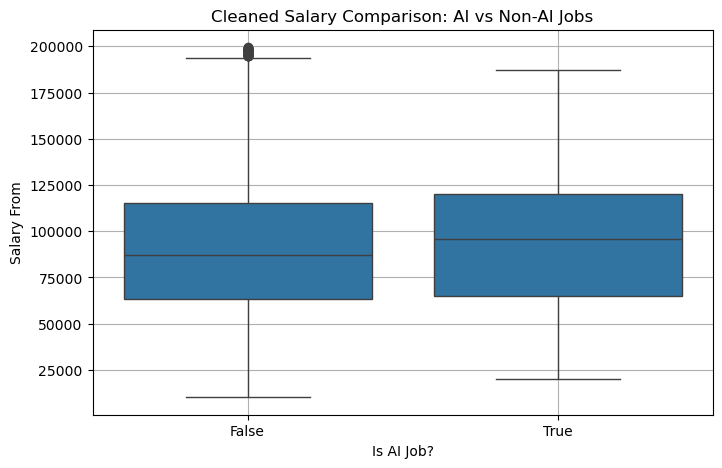

In [13]:
# AI vs Non-AI plot after outlier removal
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_ai_job', y='SALARY_FROM', data=salary_filtered)
plt.title('Cleaned Salary Comparison: AI vs Non-AI Jobs')
plt.xlabel('Is AI Job?')
plt.ylabel('Salary From')
plt.grid(True)
plt.show()


## Top Paying Regions (Cleaned Dataset)

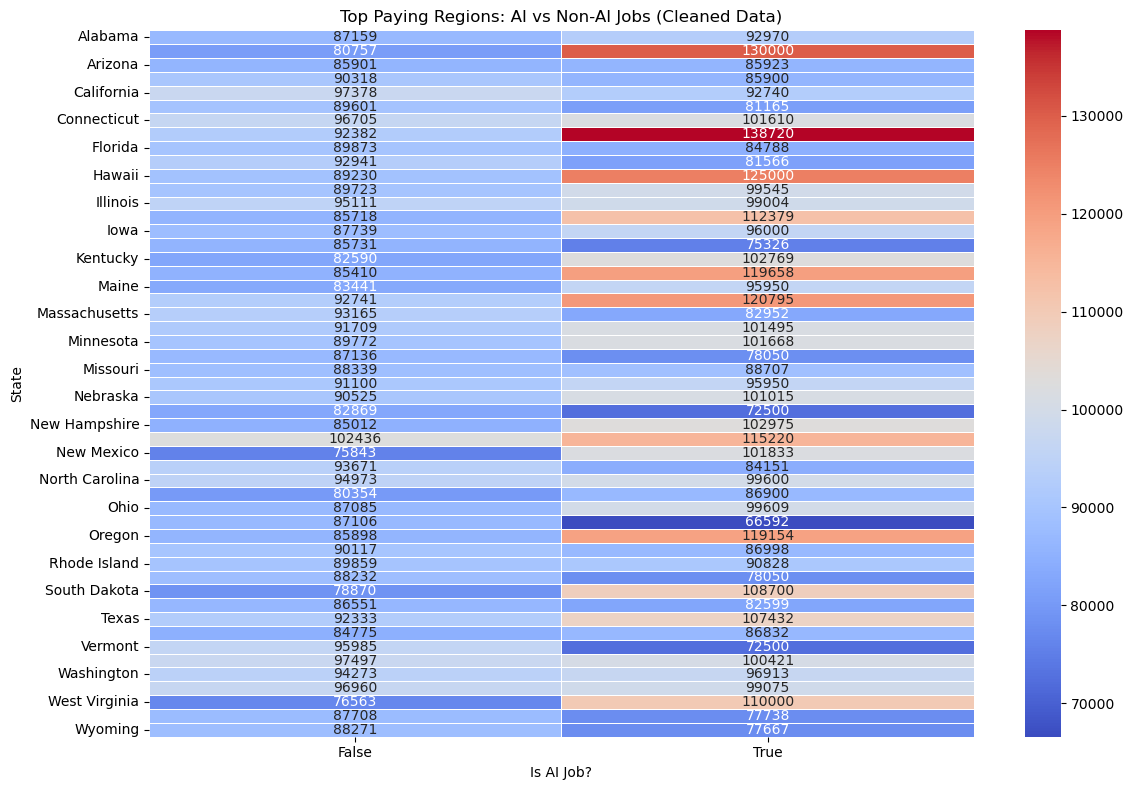

In [14]:
# Group by STATE_NAME and is_ai_job using filtered dataset
region_salary_clean = salary_filtered.groupby(['STATE_NAME', 'is_ai_job'])['SALARY_FROM'].mean().reset_index()

# Pivot for heatmap: rows = states, columns = AI/Non-AI
pivot_region_clean = region_salary_clean.pivot(index='STATE_NAME', columns='is_ai_job', values='SALARY_FROM')

# Heatmap of average salaries
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_region_clean, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.title('Top Paying Regions: AI vs Non-AI Jobs (Cleaned Data)')
plt.xlabel('Is AI Job?')
plt.ylabel('State')
plt.tight_layout()
plt.show()


## Remote vs In-Office Salary (Cleaned Dataset)

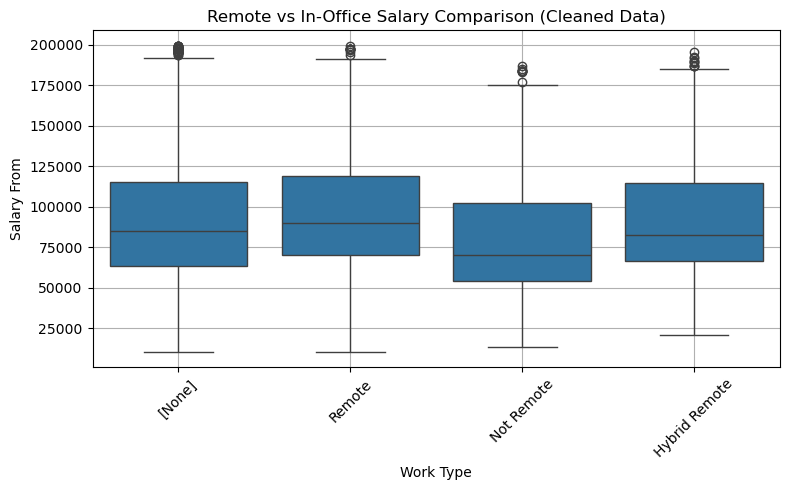

In [15]:
# Drop rows with missing remote type info
remote_clean = salary_filtered.dropna(subset=['REMOTE_TYPE_NAME'])

# Plot salary comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='REMOTE_TYPE_NAME', y='SALARY_FROM', data=remote_clean)
plt.title('Remote vs In-Office Salary Comparison (Cleaned Data)')
plt.xlabel('Work Type')
plt.ylabel('Salary From')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# the average salary by type 
remote_avg = remote_clean.groupby('REMOTE_TYPE_NAME')['SALARY_FROM'].mean().sort_values(ascending=False)
print(remote_avg)


REMOTE_TYPE_NAME
Remote           96448.291407
Hybrid Remote    92644.764242
[None]           91018.110741
Not Remote       79461.976115
Name: SALARY_FROM, dtype: float64


## Industry Salary Trends (Cleaned Dataset)

C:\Users\pooja\AppData\Local\Temp\ipykernel_48568\921481536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_filtered['POSTED'] = pd.to_datetime(salary_filtered['POSTED'], errors='coerce')
C:\Users\pooja\AppData\Local\Temp\ipykernel_48568\921481536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_filtered['year'] = salary_filtered['POSTED'].dt.year


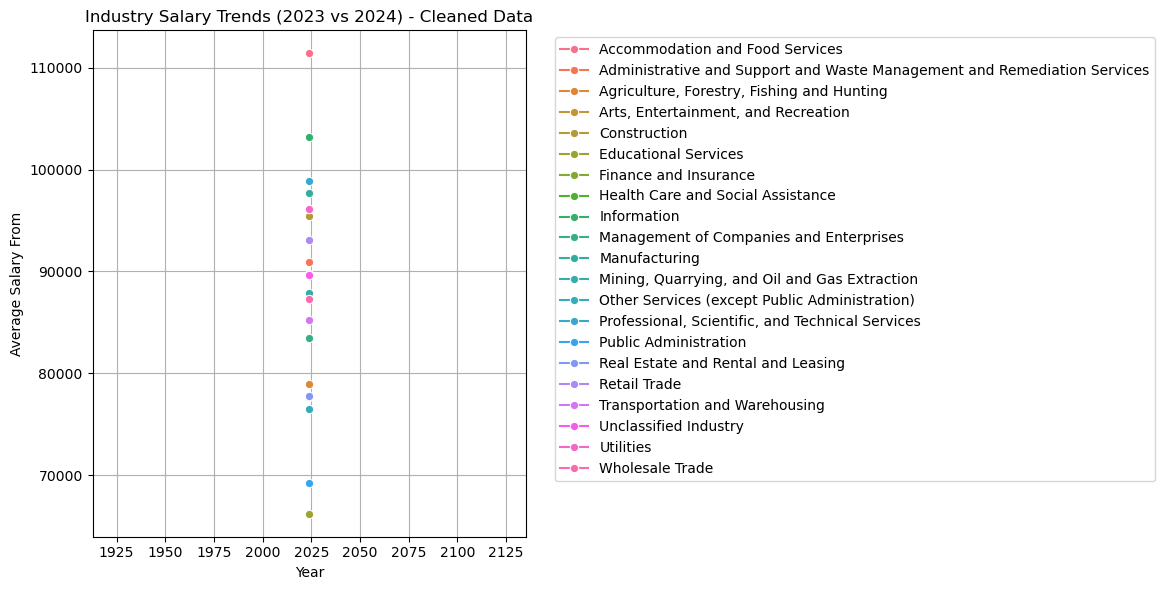

In [17]:
# Make sure 'POSTED' is in datetime format
salary_filtered['POSTED'] = pd.to_datetime(salary_filtered['POSTED'], errors='coerce')

# Extract year
salary_filtered['year'] = salary_filtered['POSTED'].dt.year

# Filter only 2023 and 2024
industry_clean = salary_filtered[salary_filtered['year'].isin([2023, 2024])]

# Group by industry and year to calculate average salary
industry_salary_trend = industry_clean.groupby(['NAICS2_NAME', 'year'])['SALARY_FROM'].mean().reset_index()

# Plot line chart of industry salary trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_salary_trend, x='year', y='SALARY_FROM', hue='NAICS2_NAME', marker='o')
plt.title('Industry Salary Trends (2023 vs 2024) - Cleaned Data')
plt.xlabel('Year')
plt.ylabel('Average Salary From')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


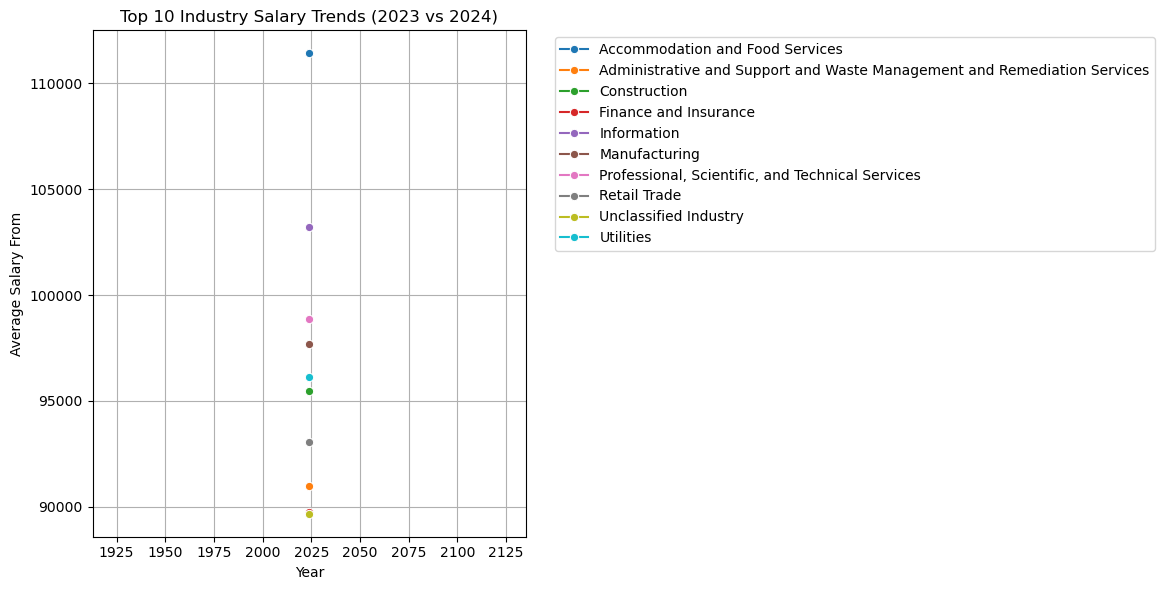

In [18]:
top_industries = industry_salary_trend[industry_salary_trend['year'] == 2024] \
    .nlargest(10, 'SALARY_FROM')['NAICS2_NAME'].tolist()

top_trend_data = industry_salary_trend[industry_salary_trend['NAICS2_NAME'].isin(top_industries)]

# Re-plot for top industries only
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_trend_data, x='year', y='SALARY_FROM', hue='NAICS2_NAME', marker='o')
plt.title('Top 10 Industry Salary Trends (2023 vs 2024)')
plt.xlabel('Year')
plt.ylabel('Average Salary From')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
